
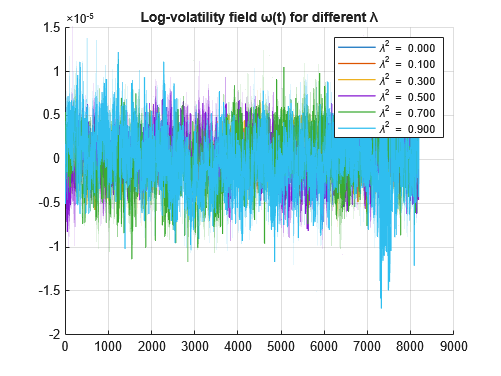

In [1]:
%% ============================================================
%  Multifractal Random Walk (MRW)
%  How the process changes with lambda (intermittency)
% ============================================================

clear; clc; close all;

N = 8192;
dt = 1.0;

lambdas = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9];   % test different intermittency levels
rng(123);

%% ============================================================
%  Function: FFT-based log-correlated field generator
% ============================================================
make_omega = @(lambda2) ...
    ( ...
        ( ...
            real(ifft( ...
                [ ...
                    0; ...
                    (sqrt(lambda2 ./ (1:(N/2))).') .* exp(1i*2*pi*randn(N/2,1)); ...
                    conj((sqrt(lambda2 ./ (1:(N/2-1))).') .* exp(1i*2*pi*randn(N/2-1,1))) ...
                ] ...
            )) ./ sqrt(N) ...
        ) ...
    - mean(real(ifft( ...
                [ ...
                    0; ...
                    (sqrt(lambda2 ./ (1:(N/2))).') .* exp(1i*2*pi*randn(N/2,1)); ...
                    conj((sqrt(lambda2 ./ (1:(N/2-1))).') .* exp(1i*2*pi*randn(N/2-1,1))) ...
                ] ...
            )) ./ sqrt(N)) ...
    );

%% ============================================================
%  Generate MRWs for each lambda
% ============================================================

omegas = cell(length(lambdas),1);
X = cell(length(lambdas),1);

for k = 1:length(lambdas)
    lambda2 = lambdas(k);

    if lambda2 == 0
        omega = zeros(N,1);
    else
        omega = make_omega(lambda2);
    end

    omegas{k} = omega;

    % MRW integration
    Xk = zeros(N,1);
    for i = 2:N
        Xk(i) = Xk(i-1) + randn() * exp(omega(i));
    end
    X{k} = Xk;
end

%% ============================================================
%  Plot ω(t) for different λ
% ============================================================

figure;
hold on;
for k = 1:length(lambdas)
    plot(omegas{k}, 'LineWidth', 1);
end
title("Log-volatility field ω(t) for different λ");
legend(arrayfun(@(x) sprintf('\\lambda^2 = %.3f', x), lambdas, 'UniformOutput', false));
grid on;


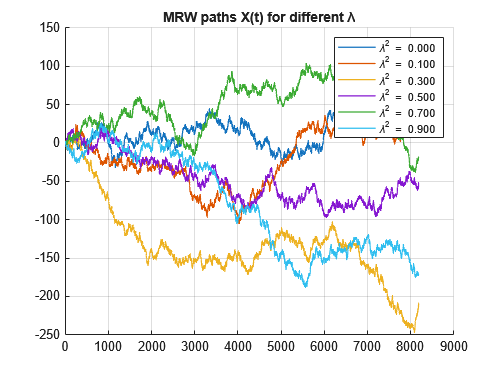

In [2]:

%% ============================================================
%  Plot MRW paths X(t)
% ============================================================

figure;
hold on;
for k = 1:length(lambdas)
    plot(X{k}, 'LineWidth', 1);
end
title("MRW paths X(t) for different λ");
legend(arrayfun(@(x) sprintf('\\lambda^2 = %.3f', x), lambdas, 'UniformOutput', false));
grid on;


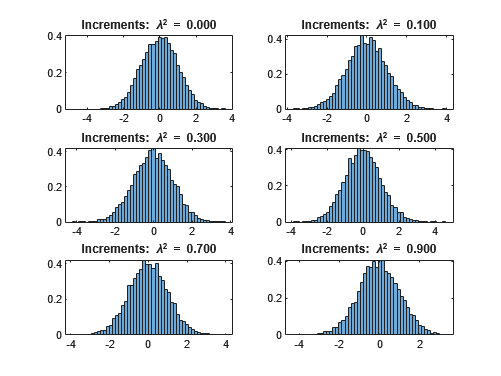

In [3]:

%% ============================================================
%  Histogram comparison of increments
% ============================================================

figure;
for k = 1:length(lambdas)
    subplot(3,2,k);
    histogram(diff(X{k}), 50, 'Normalization', 'pdf');
    title(sprintf("Increments: \\lambda^2 = %.3f", lambdas(k)));
end


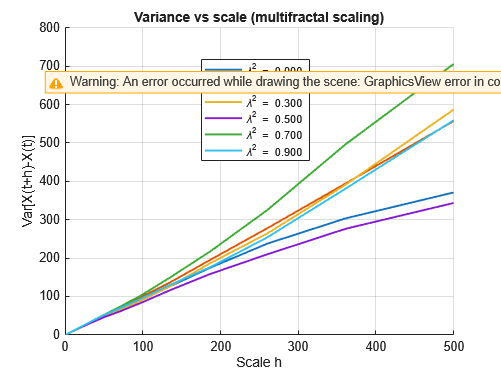

In [4]:

%% ============================================================
%  Scaling: variance vs scale (structure function)
% ============================================================

scales = round(logspace(0, log10(500), 20));
figure; hold on;

for k = 1:length(lambdas)
    Xk = X{k};
    vars = zeros(size(scales));
    for s = 1:length(scales)
        h = scales(s);
        vars(s) = var(Xk(1+h:end) - Xk(1:end-h));
    end
    loglog(scales, vars, 'LineWidth', 1.5);
end

title("Variance vs scale (multifractal scaling)");
xlabel("Scale h");
ylabel("Var[X(t+h)-X(t)]");
legend(arrayfun(@(x) sprintf('\\lambda^2 = %.3f', x), lambdas, 'UniformOutput', false));
grid on;